## Linear classification and the Perceptron algorithm

In this problem, we will solve a linear classification problem using the Perceptron algorithm.

## The dataset
We will work on the Iris dataset available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). The dataset is a single comma-separated value (CSV) file. The first 4 fields of
each line contain the measurements of a sample of Iris flower, the
last field is the name of this sample's species of Iris. More information about
the dataset can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names).

## The classification task

The goal of this problem is to construct a classifier to distinguish the [Iris setosa](https://en.wikipedia.org/wiki/Iris_setosa) from the other species of Iris. That is, we want to construct a function $f$ which takes as input the vector $x \in\mathbb{R}^4$ of
measurements of a sample and return $f(x) \in \{-1,1\}$ such that:
$$\begin{align*}
    f(x) = \begin{cases}
        1& \text{if the sample is an Iris setosa}\\
        -1& \text{otherwise}
    \end{cases}
\end{align*}$$
Work your way through this notebook and answer all of the questions.

In [34]:
# read the dataset
import csv

with open('iris-data.csv', 'r') as iris_data:
    iris_samples = list(csv.reader(iris_data, delimiter=','))

# print the first 3 rows
print(iris_samples[:3])
a = set()
for i in iris_samples[:-1]:
    # print(i[4])
    a.add(i[4])

print(a)

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']]
{'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'}


## Question 1
Choose two of the four features and draw a scatter plot of the data set where the coordinates are the two features. Assign a color to each point based on the Iris species of the sample.

You can use matplotlib for plotting, here is a [tutorial](https://matplotlib.org/users/pyplot_tutorial.html)

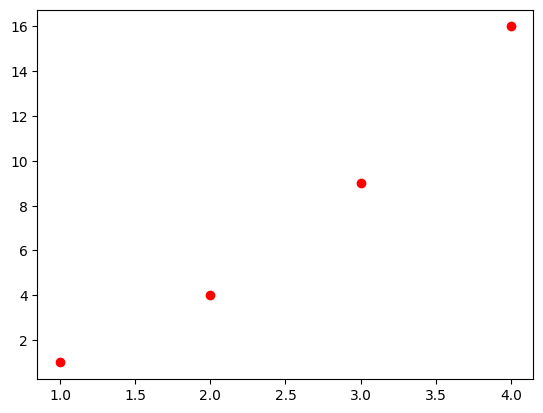

In [35]:
# example scatter plot
import matplotlib.pyplot as plt

plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.show()

## Answer

Features selected: 0 and 2.

Color mapping: 'Iris-setosa' -> Red, 'Iris-versicolor' -> Blue, 'Iris-virginica' -> Green.

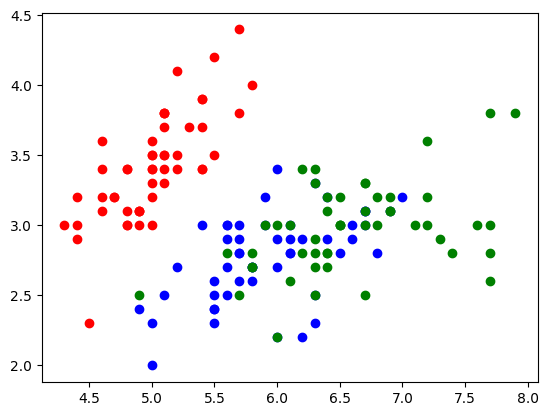

In [36]:
classes = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

points =[
    [[],[]],
    [[],[]],
    [[],[]]
]

for x in iris_samples[:-1]:
    current_class = classes[x[4]]
    points[current_class][0].append(float(x[0]))
    points[current_class][1].append(float(x[1]))

plt.plot(points[0][0], points[0][1], 'ro')
plt.plot(points[1][0], points[1][1], 'bo')
plt.plot(points[2][0], points[2][1], 'go')
plt.show()

## Question 2
Implement the perceptron algorithm that we saw in class. Run the algorithm on the Iris dataset to find a hyperplane separating the Iris setosa samples from the other samples. Print the weights defining the hyperplane.

## Implementation

In [30]:
import math 

def norm(x):
    sum = 0
    for i in x:
        sum += i ** 2
    
    return math.sqrt(sum)
    
def inner_product(x,y):
    sum = 0
    for i in range(len(x)):
        sum += x[i]*y[i]
    return sum


def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0


def perceptron(x,y):
    #initialize on 0 
    w = [0,0,0,0]

    #counter of correctly classified samples (in a row)
    continuous_correct = 0

    #index
    i = 0

    
    while continuous_correct < len(x) + 2:

        # classification rule
        if sign(inner_product(w,x[i])) != y[i]:

            # w update (per coordinate)
            for j in range(4):
                w[j] += y[i] / norm(x[i]) * x[i][j]
            continuous_correct = 0
        else:
            continuous_correct += 1

        i += 1
        if i == len(x):
            i = 0

    return w

In [39]:
x = []
y = []
for i in range(len(iris_samples) - 1):
    x.append([float(iris_samples[i][0]),float(iris_samples[i][1]),float(iris_samples[i][2]),float(iris_samples[i][3])])
    if iris_samples[i][4] == 'Iris-setosa':
        y.append(float(1))
    else:
        y.append(float(-1))

w_star = perceptron(x,y)
[round(i,3) for i in w_star]

[0.037, 0.201, -0.294, -0.122]